In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-22.9544054171062, 144.32871550128021),
 (-18.312231489823816, -5.856090039154054),
 (-40.41682015414994, 157.33054314994325),
 (52.17879325819365, -75.81083093632056),
 (-22.800000149903582, -47.13537891150989),
 (64.3184546589205, 52.791387327126046),
 (-39.08326527894887, 40.24103139906802),
 (-24.248975805090893, -162.93354725816118),
 (63.09313285419583, -145.09727306518883),
 (1.8732326826810777, 165.0836305414835),
 (3.0896822815216893, -36.64323392493955),
 (-27.57285822532444, 100.76459691252535),
 (70.64232585640437, -96.23547748617835),
 (-79.24192834190733, -30.432452810698294),
 (34.16743391058718, -20.60555415858471),
 (-3.7372220239227687, -143.0351098909651),
 (-37.920637999692374, -85.36913282813113),
 (3.98593856531366, 42.494422842774554),
 (-37.34148268922969, 7.5017933316647145),
 (-36.48140291038304, -29.704342732365234),
 (-36.55348828289825, 25.26760340674187),
 (55.65976695120682, 63.99868513247188),
 (-54.90813772723166, 82.28476491772312),
 (23.277599557162

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | charters towers
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ulladulla
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | paulinia
Processing Record 6 of Set 1 | vodnyy
Processing Record 7 of Set 1 | margate
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | fairbanks
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | itarema
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | mandera
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | kargapolye
City not found. Skipping...
Proc

Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | chicama
Processing Record 43 of Set 4 | kungurtug
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | itacare
Processing Record 48 of Set 4 | kaeo
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | vestmannaeyjar
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | san juan
Processing Record 5 of Set 5 | roros
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | bubaque
Processing Record 8 of Set 5 | palauig
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | rundu
Processing Record 11 of Set 5 | clyde river
Processing Record 12 of Set 5 | ancud
Processing Record 13 of Set 5 | lazaro cardenas
Pr

Processing Record 30 of Set 8 | atherton
Processing Record 31 of Set 8 | ostra
Processing Record 32 of Set 8 | nizhniy kuranakh
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | fairview
Processing Record 35 of Set 8 | burnie
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | gamba
Processing Record 38 of Set 8 | ayan
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | esperance
Processing Record 41 of Set 8 | abu samrah
Processing Record 42 of Set 8 | pochutla
Processing Record 43 of Set 8 | lavrentiya
Processing Record 44 of Set 8 | san andres
Processing Record 45 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 46 of Set 8 | barkhan
Processing Record 47 of Set 8 | dalvik
Processing Record 48 of Set 8 | rio gallegos
Processing Record 49 of Set 8 | ostrovnoy
Processing Record 50 of Set 8 | ajdabiya
Processing Record 1 of Set 9 | praia da vitoria
Processing Record 2 of Set 9 | minot
Processing Record

Processing Record 20 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 12 | terny
Processing Record 22 of Set 12 | tilichiki
Processing Record 23 of Set 12 | sangar
Processing Record 24 of Set 12 | meadow lake
Processing Record 25 of Set 12 | semey
Processing Record 26 of Set 12 | tralee
Processing Record 27 of Set 12 | tigzirt
Processing Record 28 of Set 12 | teluk nibung
Processing Record 29 of Set 12 | nantucket
Processing Record 30 of Set 12 | severnyy
Processing Record 31 of Set 12 | dudinka
Processing Record 32 of Set 12 | mata de sao joao
Processing Record 33 of Set 12 | nelson bay
Processing Record 34 of Set 12 | ilheus
Processing Record 35 of Set 12 | mogocha
Processing Record 36 of Set 12 | gelibolu
Processing Record 37 of Set 12 | kargasok
Processing Record 38 of Set 12 | baghmara
Processing Record 39 of Set 12 | tual
Processing Record 40 of Set 12 | lodja
Processing Record 41 of Set 12 | ndele
Processing Record 42 of Set 12 | amalapuram
Processing Record 43 

In [8]:
len(city_data)

560

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Charters Towers,-20.1000,146.2667,68.86,94,100,17.63,AU,2022-04-25 19:08:36
1,Jamestown,42.0970,-79.2353,78.44,44,100,13.80,US,2022-04-25 18:54:27
2,Ulladulla,-35.3500,150.4667,55.76,91,100,5.10,AU,2022-04-25 19:07:15
3,Chapais,49.7834,-74.8492,44.56,96,100,10.33,CA,2022-04-25 19:08:36
4,Paulinia,-22.7611,-47.1542,86.94,47,2,0.89,BR,2022-04-25 19:04:36
5,Vodnyy,63.5046,53.4095,33.96,91,100,2.86,RU,2022-04-25 19:08:37
6,Margate,51.3813,1.3862,49.10,82,75,8.99,GB,2022-04-25 19:03:11
7,Avarua,-21.2078,-159.7750,77.05,94,100,5.75,CK,2022-04-25 19:03:21
8,Fairbanks,64.8378,-147.7164,45.82,56,100,1.01,US,2022-04-25 19:01:28
9,Butaritari,3.0707,172.7902,79.52,84,39,13.67,KI,2022-04-25 19:08:38


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Charters Towers,AU,2022-04-25 19:08:36,-20.1000,146.2667,68.86,94,100,17.63
1,Jamestown,US,2022-04-25 18:54:27,42.0970,-79.2353,78.44,44,100,13.80
2,Ulladulla,AU,2022-04-25 19:07:15,-35.3500,150.4667,55.76,91,100,5.10
3,Chapais,CA,2022-04-25 19:08:36,49.7834,-74.8492,44.56,96,100,10.33
4,Paulinia,BR,2022-04-25 19:04:36,-22.7611,-47.1542,86.94,47,2,0.89
5,Vodnyy,RU,2022-04-25 19:08:37,63.5046,53.4095,33.96,91,100,2.86
6,Margate,GB,2022-04-25 19:03:11,51.3813,1.3862,49.10,82,75,8.99
7,Avarua,CK,2022-04-25 19:03:21,-21.2078,-159.7750,77.05,94,100,5.75
8,Fairbanks,US,2022-04-25 19:01:28,64.8378,-147.7164,45.82,56,100,1.01
9,Butaritari,KI,2022-04-25 19:08:38,3.0707,172.7902,79.52,84,39,13.67


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

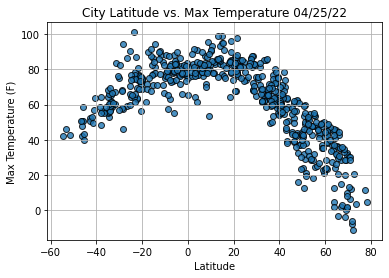

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

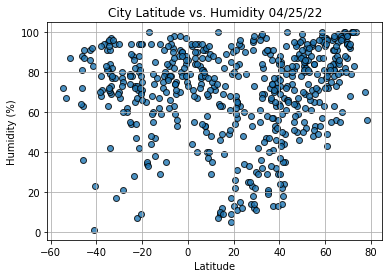

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

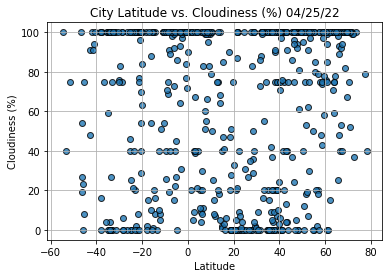

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

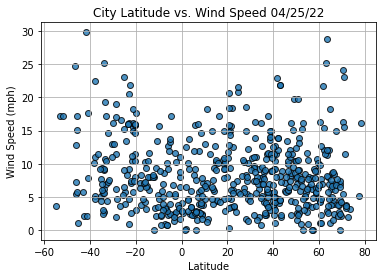

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()